# Analysis on data

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
df = pd.read_csv("Iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


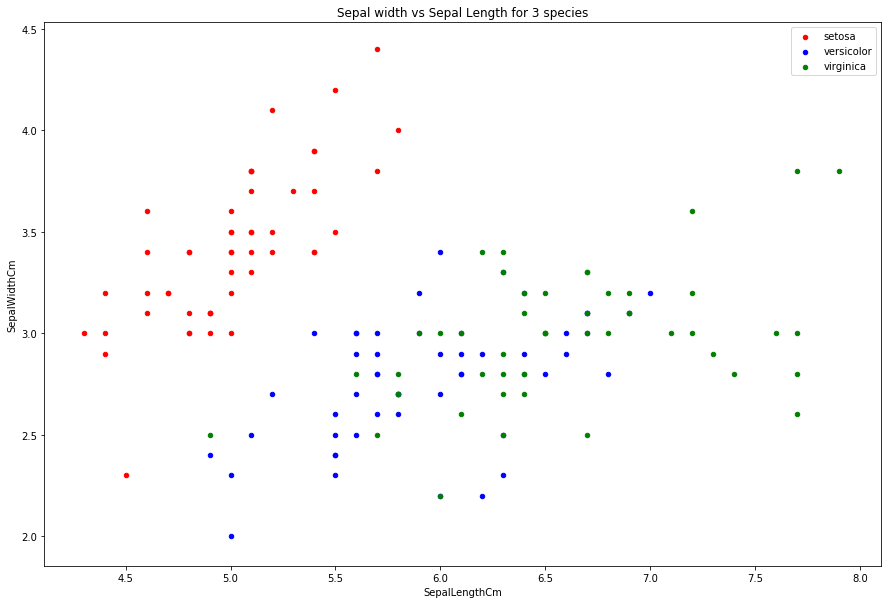

In [27]:
fig = df[df.Species=="Iris-setosa"].plot(kind="scatter", x = "SepalLengthCm", y ="SepalWidthCm",color='Red',label='setosa')
df[df.Species=="Iris-versicolor"].plot(kind="scatter", x = "SepalLengthCm", y ="SepalWidthCm",color='Blue',label='versicolor',ax=fig)
df[df.Species=="Iris-virginica"].plot(kind="scatter", x = "SepalLengthCm", y ="SepalWidthCm",color='Green',label='virginica',ax=fig)

fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Sepal width vs Sepal Length for 3 species")
plt.show()

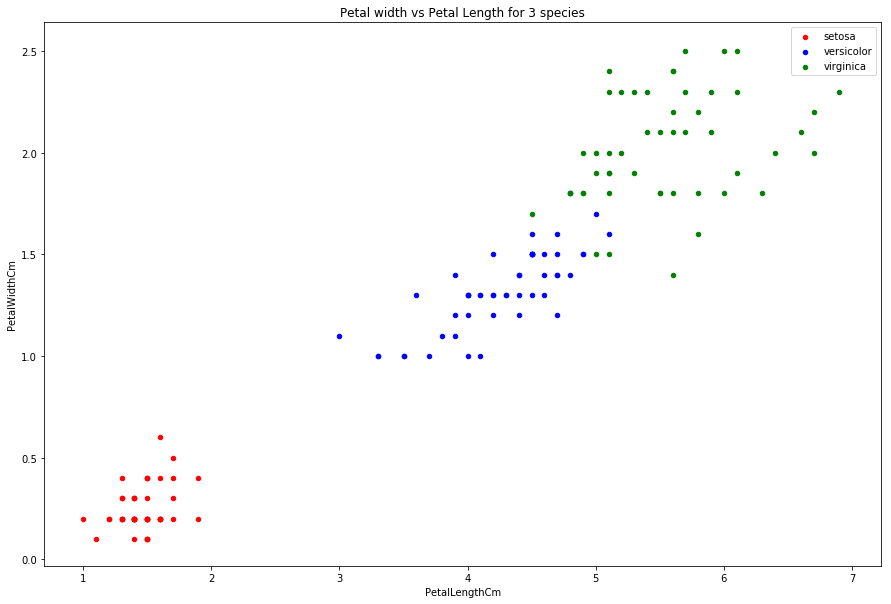

In [28]:
fig = df[df.Species=="Iris-setosa"].plot(kind="scatter", x = "PetalLengthCm", y ="PetalWidthCm",color='Red',label='setosa')
df[df.Species=="Iris-versicolor"].plot(kind="scatter", x = "PetalLengthCm", y ="PetalWidthCm",color='Blue',label='versicolor',ax=fig)
df[df.Species=="Iris-virginica"].plot(kind="scatter", x = "PetalLengthCm", y ="PetalWidthCm",color='Green',label='virginica',ax=fig)

fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Petal width vs Petal Length for 3 species")
plt.show()

Populating the interactive namespace from numpy and matplotlib


c:\python-3.6.5\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


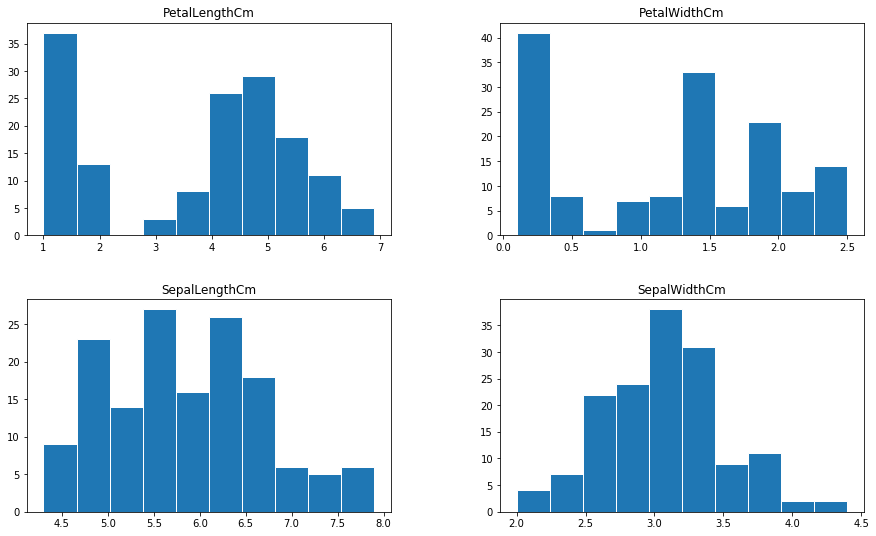

In [29]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
df.hist(edgecolor='white',grid=False)
plt.show()

In [30]:
import seaborn as sns

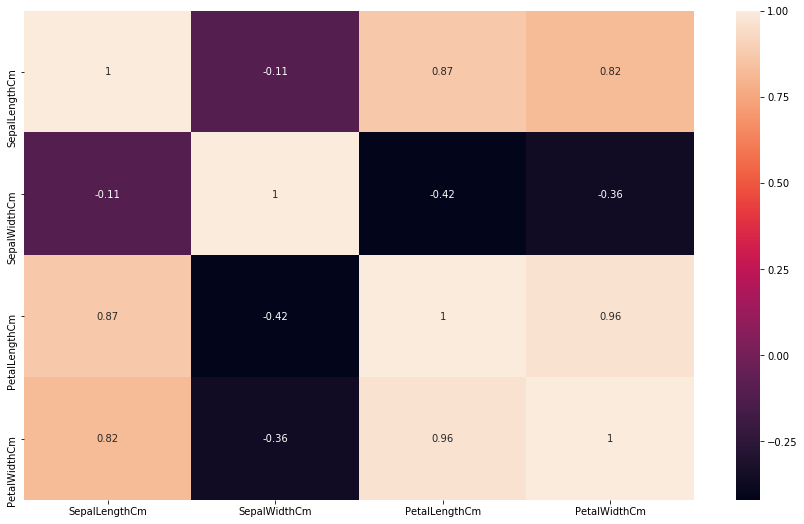

In [31]:
sns.heatmap(df.corr(),annot=True)

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

# Logistic Regression

In [132]:
split_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
num_cor_pred = []
total_y_test = []
df.shape

(150, 5)

In [133]:
for i in range(9):    
    train, test = train_test_split(df,test_size=split_ratios[i])

    #print(train.shape)

    train_x = train.iloc[:,[0,1,2,3]]
    train_y = train.iloc[:,4]

    test_x = test.iloc[:,[0,1,2,3]]
    test_y = test.iloc[:,4]

    model = LogisticRegression(solver="lbfgs",multi_class="auto")
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)

    #print(prediction)
    num_cor_pred.append((prediction==test_y).sum())
    print("correct predictions are " + str((prediction==test_y).sum()) + " and accuracy score is " + str(metrics.accuracy_score(prediction,test_y)))
    total_y_test.append(test_y.shape[0])
    print("Out of " + str(test_y.shape[0]) + " for split(test) " + str(split_ratios[i]))
print(num_cor_pred)
print(total_y_test)

correct predictions are 14 and accuracy score is 0.9333333333333333
Out of 15 for split(test) 0.1
correct predictions are 27 and accuracy score is 0.9
Out of 30 for split(test) 0.2
correct predictions are 43 and accuracy score is 0.9555555555555556
Out of 45 for split(test) 0.3
correct predictions are 59 and accuracy score is 0.9833333333333333
Out of 60 for split(test) 0.4
correct predictions are 72 and accuracy score is 0.96
Out of 75 for split(test) 0.5
correct predictions are 86 and accuracy score is 0.9555555555555556
Out of 90 for split(test) 0.6
correct predictions are 100 and accuracy score is 0.9523809523809523
Out of 105 for split(test) 0.7
correct predictions are 113 and accuracy score is 0.9416666666666667
Out of 120 for split(test) 0.8
correct predictions are 98 and accuracy score is 0.725925925925926
Out of 135 for split(test) 0.9
[14, 27, 43, 59, 72, 86, 100, 113, 98]
[15, 30, 45, 60, 75, 90, 105, 120, 135]


c:\python-3.6.5\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\python-3.6.5\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\python-3.6.5\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [134]:
num_cor_pred = np.array(num_cor_pred)
total_y_test = np.array(total_y_test)

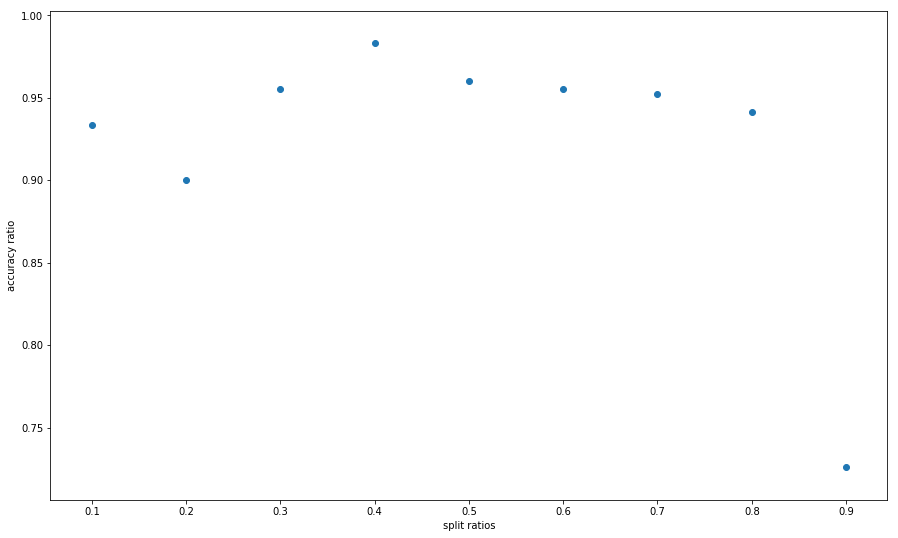

In [135]:
plt.scatter(x=split_ratios,y=num_cor_pred/total_y_test)
plt.xlabel("split ratios")
plt.ylabel("accuracy ratio")
plt.show()

# Support Vector Machine

In [136]:
split_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
num_cor_pred = []
total_y_test = []
df.shape

for i in range(9):    
    train, test = train_test_split(df,test_size=split_ratios[i])

    #print(train.shape)

    train_x = train.iloc[:,[0,1,2,3]]
    train_y = train.iloc[:,4]

    test_x = test.iloc[:,[0,1,2,3]]
    test_y = test.iloc[:,4]

    model = svm.SVC(gamma='scale')
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)

    #print(prediction)
    num_cor_pred.append((prediction==test_y).sum())
    print("correct predictions are " + str((prediction==test_y).sum()) + " and accuracy score is " + str(metrics.accuracy_score(prediction,test_y)))
    total_y_test.append(test_y.shape[0])
    print("Out of " + str(test_y.shape[0]) + " for split(test) " + str(split_ratios[i]))
print(num_cor_pred)
print(total_y_test)

correct predictions are 15 and accuracy score is 1.0
Out of 15 for split(test) 0.1
correct predictions are 30 and accuracy score is 1.0
Out of 30 for split(test) 0.2
correct predictions are 43 and accuracy score is 0.9555555555555556
Out of 45 for split(test) 0.3
correct predictions are 60 and accuracy score is 1.0
Out of 60 for split(test) 0.4
correct predictions are 71 and accuracy score is 0.9466666666666667
Out of 75 for split(test) 0.5
correct predictions are 84 and accuracy score is 0.9333333333333333
Out of 90 for split(test) 0.6
correct predictions are 100 and accuracy score is 0.9523809523809523
Out of 105 for split(test) 0.7
correct predictions are 110 and accuracy score is 0.9166666666666666
Out of 120 for split(test) 0.8
correct predictions are 125 and accuracy score is 0.9259259259259259
Out of 135 for split(test) 0.9
[15, 30, 43, 60, 71, 84, 100, 110, 125]
[15, 30, 45, 60, 75, 90, 105, 120, 135]


In [137]:
num_cor_pred = np.array(num_cor_pred)
total_y_test = np.array(total_y_test)

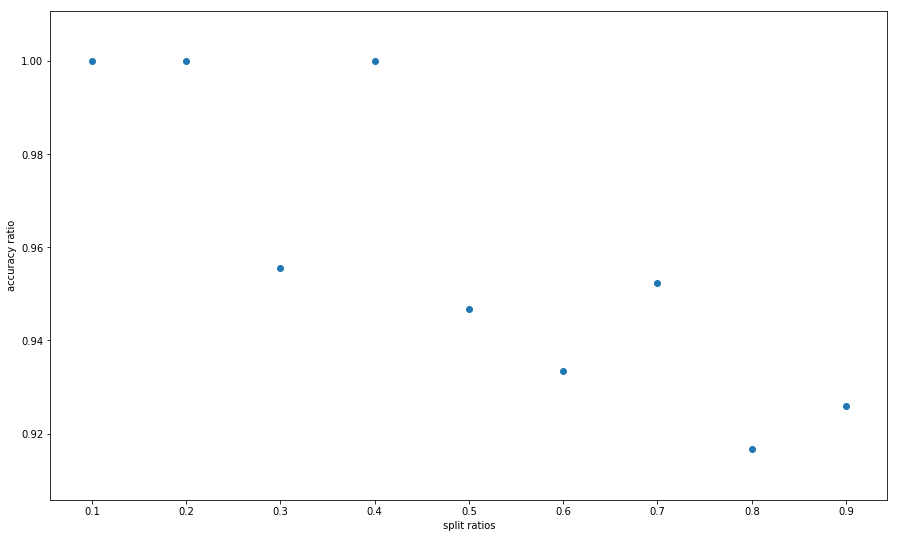

In [138]:
plt.scatter(x=split_ratios,y=num_cor_pred/total_y_test)
plt.xlabel("split ratios")
plt.ylabel("accuracy ratio")
plt.show()

# Decision Tree

In [139]:
split_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
num_cor_pred = []
total_y_test = []
df.shape

for i in range(9):    
    train, test = train_test_split(df,test_size=split_ratios[i])

    #print(train.shape)

    train_x = train.iloc[:,[0,1,2,3]]
    train_y = train.iloc[:,4]

    test_x = test.iloc[:,[0,1,2,3]]
    test_y = test.iloc[:,4]

    model = DecisionTreeClassifier()
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)

    #print(prediction)
    num_cor_pred.append((prediction==test_y).sum())
    print("correct predictions are " + str((prediction==test_y).sum()) + " and accuracy score is " + str(metrics.accuracy_score(prediction,test_y)))
    total_y_test.append(test_y.shape[0])
    print("Out of " + str(test_y.shape[0]) + " for split(test) " + str(split_ratios[i]))
print(num_cor_pred)
print(total_y_test)

correct predictions are 15 and accuracy score is 1.0
Out of 15 for split(test) 0.1
correct predictions are 29 and accuracy score is 0.9666666666666667
Out of 30 for split(test) 0.2
correct predictions are 44 and accuracy score is 0.9777777777777777
Out of 45 for split(test) 0.3
correct predictions are 59 and accuracy score is 0.9833333333333333
Out of 60 for split(test) 0.4
correct predictions are 73 and accuracy score is 0.9733333333333334
Out of 75 for split(test) 0.5
correct predictions are 84 and accuracy score is 0.9333333333333333
Out of 90 for split(test) 0.6
correct predictions are 98 and accuracy score is 0.9333333333333333
Out of 105 for split(test) 0.7
correct predictions are 115 and accuracy score is 0.9583333333333334
Out of 120 for split(test) 0.8
correct predictions are 129 and accuracy score is 0.9555555555555556
Out of 135 for split(test) 0.9
[15, 29, 44, 59, 73, 84, 98, 115, 129]
[15, 30, 45, 60, 75, 90, 105, 120, 135]


In [140]:
num_cor_pred = np.array(num_cor_pred)
total_y_test = np.array(total_y_test)

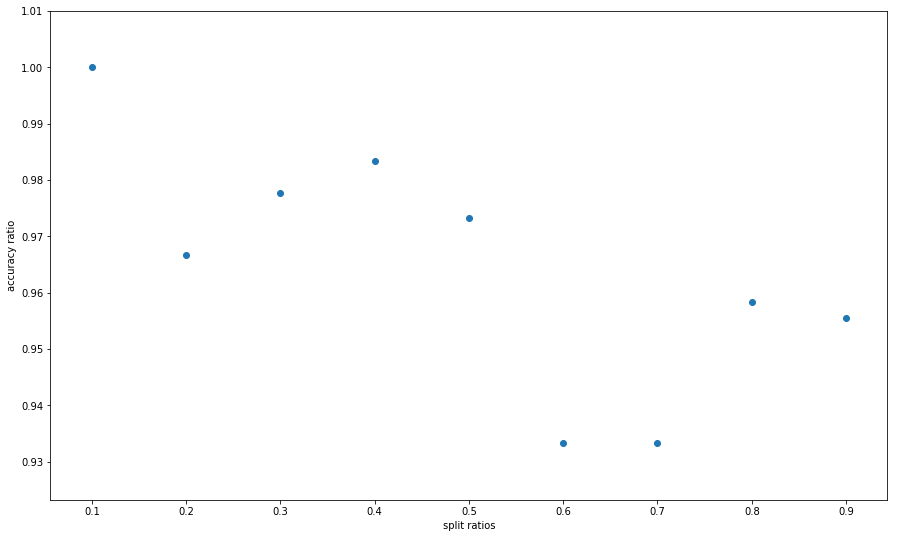

In [141]:
plt.scatter(x=split_ratios,y=num_cor_pred/total_y_test)
plt.xlabel("split ratios")
plt.ylabel("accuracy ratio")
plt.show()

# K Nearest Neighbours

In [142]:
split_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
num_cor_pred = []
total_y_test = []
df.shape

for i in range(9):    
    train, test = train_test_split(df,test_size=split_ratios[i])

    #print(train.shape)

    train_x = train.iloc[:,[0,1,2,3]]
    train_y = train.iloc[:,4]

    test_x = test.iloc[:,[0,1,2,3]]
    test_y = test.iloc[:,4]

    model = KNeighborsClassifier()
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)

    #print(prediction)
    num_cor_pred.append((prediction==test_y).sum())
    print("correct predictions are " + str((prediction==test_y).sum()) + " and accuracy score is " + str(metrics.accuracy_score(prediction,test_y)))
    total_y_test.append(test_y.shape[0])
    print("Out of " + str(test_y.shape[0]) + " for split(test) " + str(split_ratios[i]))
print(num_cor_pred)
print(total_y_test)

correct predictions are 12 and accuracy score is 0.8
Out of 15 for split(test) 0.1
correct predictions are 28 and accuracy score is 0.9333333333333333
Out of 30 for split(test) 0.2
correct predictions are 43 and accuracy score is 0.9555555555555556
Out of 45 for split(test) 0.3
correct predictions are 58 and accuracy score is 0.9666666666666667
Out of 60 for split(test) 0.4
correct predictions are 73 and accuracy score is 0.9733333333333334
Out of 75 for split(test) 0.5
correct predictions are 86 and accuracy score is 0.9555555555555556
Out of 90 for split(test) 0.6
correct predictions are 94 and accuracy score is 0.8952380952380953
Out of 105 for split(test) 0.7
correct predictions are 107 and accuracy score is 0.8916666666666667
Out of 120 for split(test) 0.8
correct predictions are 120 and accuracy score is 0.8888888888888888
Out of 135 for split(test) 0.9
[12, 28, 43, 58, 73, 86, 94, 107, 120]
[15, 30, 45, 60, 75, 90, 105, 120, 135]


In [143]:
num_cor_pred = np.array(num_cor_pred)
total_y_test = np.array(total_y_test)

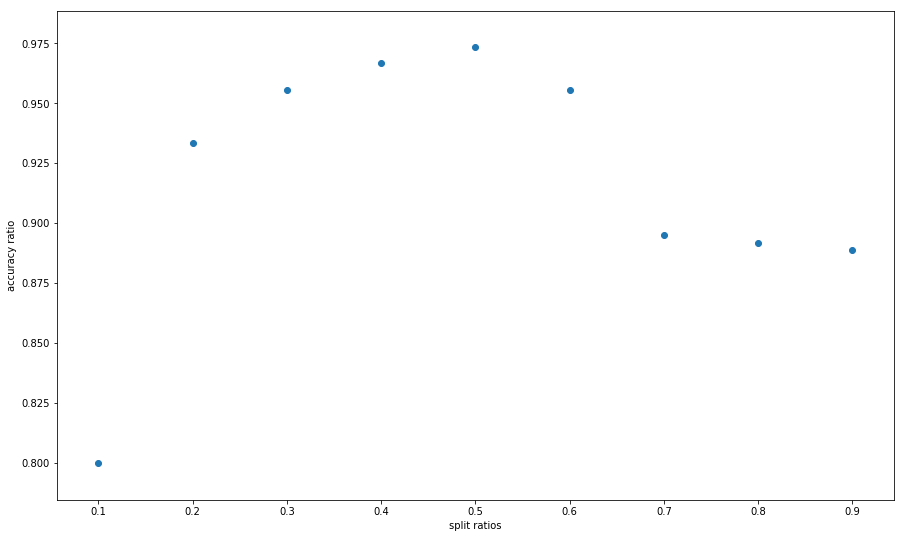

In [144]:
plt.scatter(x=split_ratios,y=num_cor_pred/total_y_test)
plt.xlabel("split ratios")
plt.ylabel("accuracy ratio")
plt.show()